# Edge Detection
SAAS DF Education HW 1

## Imports

Don't worry too much about this section, but these are the tools we'll be using to play with derivatives and edge detection!

As a warning, these `pip` installs below will `pip install` into your root python directory. It would technically be better to use `conda`. If you don't know what any of those are, just ignore this and don't worry about it, we can always fix it later.

In [1]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib

/Users/aathreyakadambi/.zshenv:1: permission denied: /usr/local/texlive/2024basic/bin
/Users/aathreyakadambi/.zshenv:1: permission denied: /usr/local/texlive/2024basic/bin
/Users/aathreyakadambi/.zshenv:1: permission denied: /usr/local/texlive/2024basic/bin
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 8.1 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.3 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)


In [39]:
import numpy as np # working with numbers (vectors, matrices, tensors)
import cv2 # working with images
import matplotlib.pyplot as plt # making plots

## Derivatives In Practice

As mentioned in lecture, as data scientists you won't have the luxery of working with algebraic functions to differentiate. You'll be working with real data, which is usually "discrete".

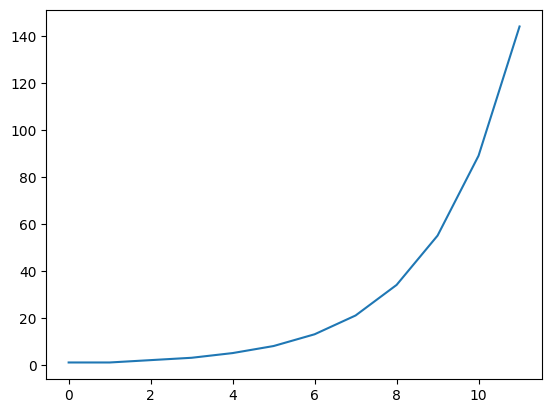

In [40]:
# population data for geese in new jersey
fibb_data = np.array([ 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144 ])
plt.plot(fibb_data)

New Jersey has a lot of Geese, and it turns out that their population over time is the Fibonacci sequence (wow, that means a lot of poop on the soccer fields)! Can you determine how fast the growth of these Geese is?

*Hint:* Remember, we call it a "differential". In the discrete case, derivatives, or rate of change, is pretty mcuh taking differences! In general, derivatives are sort of like taking differences of things that are as close as possible to each other.

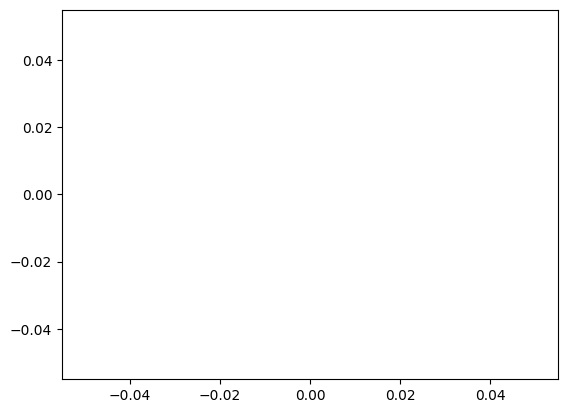

In [41]:
# fill the "[ ]" in manually or with Python if you're familiar with it!
rate_of_population_increase = np.array([ ]) # a list of numbers, indicating the "differential" at each time
plt.plot(rate_of_population_increase)

Let's try to do this another way (unless you already did it this way above).

We can take the differences of the list using two copies of the list: one of the normal list, and one shifted to the right.

There is a catch to this though, since you won't be able to directly subtract the lists at that point. Let's see if you can figure it out! If you get stuck, ask us for help!

In [ ]:
unshifted_list = ...
right_shifted = ...
diff = unshifted_list - right_shifted # difference
diff

Do you get the same thing as before?

In [ ]:
plt.plot(diff)

The same way that we do these differences for a "one dimensional" list, we can do differences for an image, which is sort of "two dimensional". Just like we mentioned, we can only really take derivatives in one direction at a time, so first we go horizontal, and then we go vertical.

## OpenCV

First, we'll need to load in our images. `OpenCV` is a common package for working with images, so we'll use it to load our images. Don't worry about this too much if you're not that familiar with python, but just read through it to marinate in the sauces a bit.

In [13]:
DATA_DIR = "./raw_data/" # the location of our raw data

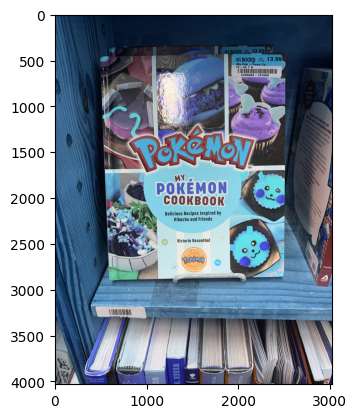

In [22]:
# load in the pokemon cookbook image
pokemon_cookbook = cv2.imread(DATA_DIR + "IMG_7689.jpg")
plt.imshow(pokemon_cookbook) # imshow, for "image show"

You might notice the colors are strange. Matplotlib and OpenCV unfortunately use different color schemes (OpenCV uses BGR instead of RGB for some reason) by default 😩 so we'll need to tell Matplotlib to use the right one:

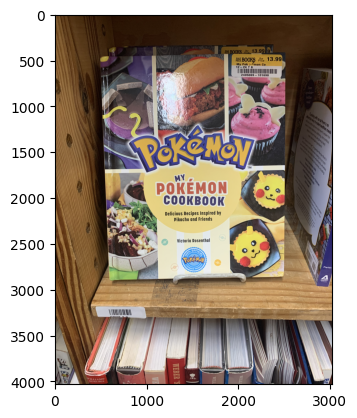

In [23]:
plt.imshow(cv2.cvtColor(pokemon_cookbook, cv2.COLOR_BGR2RGB))

Great!

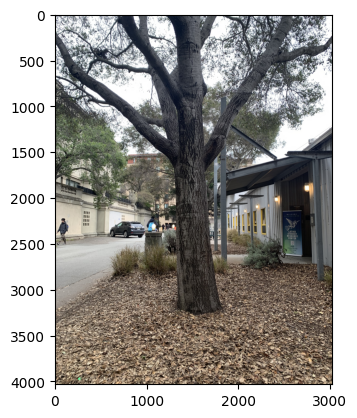

In [18]:
tree = cv2.imread(DATA_DIR + "IMG_7690.jpg")
plt.imshow(cv2.cvtColor(tree, cv2.COLOR_BGR2RGB))

Notice that these are actually arrays/tables in data!

In [20]:
tree # look at what tree really is

array([[[190, 179, 171],
        [176, 167, 158],
        [178, 171, 162],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]],

       [[190, 177, 169],
        [169, 158, 150],
        [182, 173, 164],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]],

       [[180, 164, 157],
        [154, 141, 133],
        [164, 153, 145],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]],

       ...,

       [[195, 224, 239],
        [197, 226, 241],
        [200, 228, 245],
        ...,
        [181, 213, 232],
        [184, 216, 235],
        [185, 218, 238]],

       [[196, 225, 240],
        [198, 227, 242],
        [201, 230, 245],
        ...,
        [168, 200, 219],
        [171, 203, 222],
        [175, 208, 227]],

       [[198, 227, 242],
        [200, 229, 244],
        [202, 231, 246],
        ...,
        [157, 189, 208],
        [164, 196, 215],
        [171, 204, 223]]

In [25]:
tree.shape # the shape of a numpy array/tensor

(4032, 3024, 3)

This tells us that the dimension of our image are 4032 pixels by 3024 pixels, with 3 components, BGR, for each pixel. This is called a tensor!

## The Cool Part: Contour Detection

This will be somewhat tricky if you're not used to Python, but think about how to take each difference.

To take a horizontal difference, we want to sort of subtract each pixel from the pixel to its right.

One way to do this is to make two copies of the image, one the original, and one shifted by one to the right, and "subtracting" the two images.

### "Partial Derivative in $x$"

In [47]:
original_image = pokemon_cookbook[:,:-1,:] # drop the last column (shifting to the right)
shifted_right = pokemon_cookbook[:,1:,:] # drop the first column (why do we do this?)

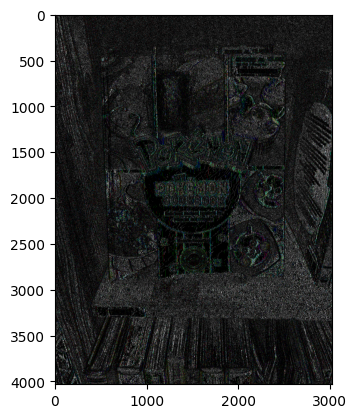

In [55]:
diff = original_image - shifted_right

THRESHOLD = 254
masked = np.where(diff > THRESHOLD, diff, 0)
plt.imshow(masked, cmap='gray')

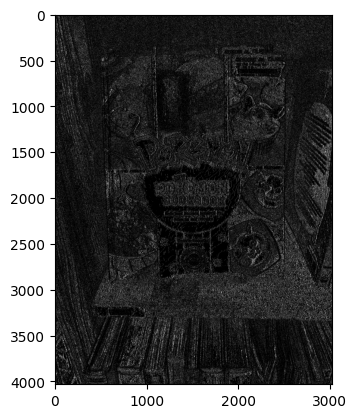

In [57]:
# see one channel at a time
plt.imshow(masked[:,:,2], cmap='gray')

### "Partial Derivative in $y$"

Your turn! Try to do the other direction!

In [60]:
original_image = ...
shifted_down = ...

In [ ]:
diff = original_image - shifted_down

THRESHOLD = 254
masked = np.where(diff > THRESHOLD, diff, 0)
plt.imshow(masked, cmap='gray')

### Magnitude of Gradient (Challenge)

Lastly, it can be cool to look at the "magnitude of the gradient". This is defined by:
$$\|\nabla f\| = \left(\frac{\partial f}{\partial x}\right)^2 + \left(\frac{\partial f}{\partial y}\right)^2$$

You already have the partials, can you plot the magnitude of the gradient? Make a plot for each channel.

## Discussion

You might have noticed that these results aren't that good, especially since there is so much going on in the images! To counter this, we can blur the images before doing the above analysis. By doing this, we "blur out the noise" and make the lines and contours more clear! If you're interested in contour detection, check out some of the documentation for OpenCV!